In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('logbook_assignment1.csv', low_memory=False)


## Question 1


In [3]:
# 1.1.1
# determine what are not propper dates
# Improper formatting/garbage
# Propper date is month/day/year
# Note this only works if we clean up the stuff df["date_feuled"] = pd.to_datetime(df["date_feuled"], format='%b %d %Y', errors='raise')
import pandas as pd
import numpy as np

# Load the dataset
# df = df.head(100)
# Define a function to check if the date is valid
def is_valid_date(date_str):
    if pd.isna(date_str):
        return False
    try:
        pd.to_datetime(date_str, format='%b %d %Y', errors='raise')
        return True
        
    except (ValueError, TypeError):
        return False

# Apply the function to the 'date_fueled' column
# Creating a new column valid_date_feuled (this is the data set in memory not the actual csv file)
# this column is a binary column into trues and false

df['valid_date_fueled'] = df['date_fueled'].apply(is_valid_date)

# Calculate the percentage of invalid dates
invalid_date_percentage = (df['valid_date_fueled'].value_counts(normalize=True) * 100)[False]

print(f"Percentage of invalid 'date_fueled' entries: {invalid_date_percentage:.2f}%")


Percentage of invalid 'date_fueled' entries: 11.68%


In [4]:
# 1.1.2
df['date_fueled'] = df.apply(lambda row: row['date_captured'] if not is_valid_date(row['date_fueled']) and is_valid_date(row['date_captured']) else row['date_fueled'], axis=1)
df.head(11)
#df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,valid_date_fueled
0,Apr 7 2022,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,False
1,Nov 7 2012,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150,True
2,Sep 22 2012,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...,True
3,May 4 2019,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233,True
4,Feb 15 2022,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,True
5,Oct 23 2021,Oct 23 2021,"147,567",3.413,$3.739,$12.76,29.0,NaN,https://www.somewebsite.com/volkswagen/passat/...,True
6,Nov 20 2021,Dec 12 2021,"105,929",9.044,$4.639,$41.96,29.5,NaN,https://www.somewebsite.com/mazda/3_sport/2010...,True
7,Jan 20 2022,Jan 20 2022,"59,475",14.962,$2.929,$43.82,27.3,NaN,https://www.somewebsite.com/subaru/forester/20...,True
8,Apr 16 2018,Apr 16 2018,"137,562",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/kianival/2009/789684,False
9,Nov 29 2020,Nov 29 2020,"99,296",2.710,$1.999,$5.42,0.0,NaN,https://www.somewebsite.com/lexus/rx350/2012/8...,False


In [5]:
#1.1.3
df['date_fueled'] = df.apply(lambda row: pd.NaT if not is_valid_date(row['date_fueled']) else row['date_fueled'], axis=1)
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
df['date_captured'] = pd.to_datetime(df['date_captured'], errors='coerce')
print(df.dtypes)
df.head(11)

date_fueled          datetime64[ns]
date_captured        datetime64[ns]
odometer                     object
gallons                      object
cost_per_gallon              object
total_spent                  object
mpg                          object
miles                        object
user_url                     object
valid_date_fueled              bool
dtype: object


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,valid_date_fueled
0,2022-04-07,2022-04-07,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,False
1,2012-11-07,2016-08-30,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150,True
2,2012-09-22,2012-09-28,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...,True
3,2019-05-04,2019-05-04,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233,True
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,True
5,2021-10-23,2021-10-23,"147,567",3.413,$3.739,$12.76,29.0,NaN,https://www.somewebsite.com/volkswagen/passat/...,True
6,2021-11-20,2021-12-12,"105,929",9.044,$4.639,$41.96,29.5,NaN,https://www.somewebsite.com/mazda/3_sport/2010...,True
7,2022-01-20,2022-01-20,"59,475",14.962,$2.929,$43.82,27.3,NaN,https://www.somewebsite.com/subaru/forester/20...,True
8,2018-04-16,2018-04-16,"137,562",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/kianival/2009/789684,False
9,2020-11-29,2020-11-29,"99,296",2.710,$1.999,$5.42,0.0,NaN,https://www.somewebsite.com/lexus/rx350/2012/8...,False


In [6]:
#1.1.4
# NOTE do we change both columns, and when they say remove do they mean "NaT" or remove the row?

df['date_fueled'] = df.apply(lambda row: pd.NaT if (row['date_fueled'].year < 2005 or row['date_fueled']>pd.Timestamp.now()) else row['date_fueled'], axis=1)
df['date_captured'] = df.apply(lambda row: pd.NaT if (row['date_captured'].year < 2005 or row['date_captured']>pd.Timestamp.now()) else row['date_captured'], axis=1)

df.head()


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,valid_date_fueled
0,2022-04-07,2022-04-07,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,False
1,2012-11-07,2016-08-30,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150,True
2,2012-09-22,2012-09-28,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...,True
3,2019-05-04,2019-05-04,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233,True
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,True


C:\Users\saadd\AppData\Local\Temp\ipykernel_19212\2437394857.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_graphing, x='year', palette='Reds')


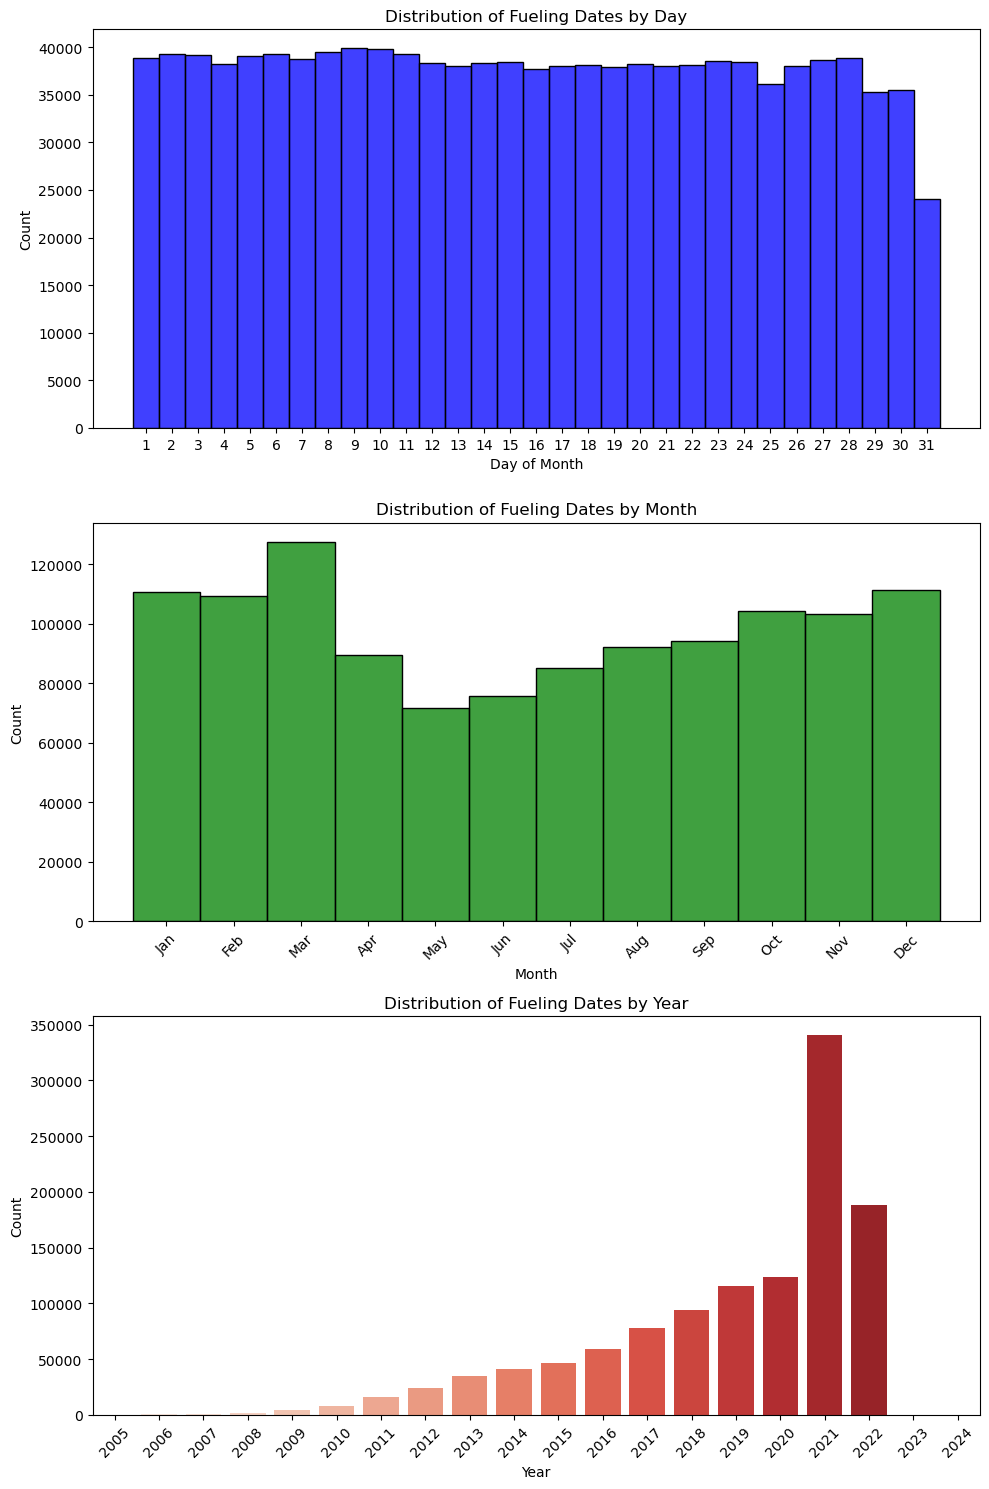

In [7]:
#1.1.5

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame creation for demonstration purposes
# df = pd.read_csv('your_data.csv')  # Uncomment and use your actual data

# Ensure 'date_fueled' is in datetime format
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')

# Drop rows where 'date_fueled' is NaT (not-a-time)
df_graphing = df.copy()
df_graphing = df_graphing.dropna(subset=['date_fueled'])

# Extract day, month, and year
df_graphing['day'] = df_graphing['date_fueled'].dt.day
df_graphing['month'] = df_graphing['date_fueled'].dt.month
df_graphing['year'] = df_graphing['date_fueled'].dt.year

# Plot settings
plt.figure(figsize=(10, 15))

# Plot for day
plt.subplot(3, 1, 1)
sns.histplot(df_graphing['day'], bins=31, discrete=True, kde=False, color='blue')
plt.title('Distribution of Fueling Dates by Day')
plt.xlabel('Day of Month')
plt.ylabel('Count')
plt.xticks(range(1, 32))  # Set x-ticks to show all days of the month

# Plot for month
plt.subplot(3, 1, 2)
sns.histplot(df_graphing['month'], bins=12, discrete=True, kde=False, color='green')
plt.title('Distribution of Fueling Dates by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Plot for year
plt.subplot(3, 1, 3)
sns.countplot(data=df_graphing, x='year', palette='Reds')
plt.title('Distribution of Fueling Dates by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [8]:
#1.2.1

missing_gallons = df['gallons'].isna().mean() * 100
missing_miles = df['miles'].isna().mean() * 100
missing_odometer = df['odometer'].isna().mean() * 100

# Print out the percentages
print(f"Percentage of missing values in 'gallons': {missing_gallons:.2f}%")
print(f"Percentage of missing values in 'miles': {missing_miles:.2f}%")
print(f"Percentage of missing values in 'odometer': {missing_odometer:.2f}%")


Percentage of missing values in 'gallons': 6.32%
Percentage of missing values in 'miles': 87.55%
Percentage of missing values in 'odometer': 12.70%


In [9]:
#1.2.3

def to_float(x):
    try:
        # Remove any non-numeric characters (except for the decimal point)
        cleaned = x.replace(',', '')
        return float(cleaned)
    except:
        return None  # Return None if conversion fail
    
df['miles'] = df['miles'].apply(lambda x: to_float(x) if isinstance(x, str) else x)
df['odometer'] = df['odometer'].apply(lambda x: to_float(x) if isinstance(x, str) else x)
df['gallons'] = df['gallons'].apply(lambda x: to_float(x) if isinstance(x, str) else x)


df.head(10)

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,valid_date_fueled
0,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,False
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150,True
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...,True
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233,True
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,True
5,2021-10-23,2021-10-23,147567.0,3.413,$3.739,$12.76,29.0,NaN,https://www.somewebsite.com/volkswagen/passat/...,True
6,2021-11-20,2021-12-12,105929.0,9.044,$4.639,$41.96,29.5,NaN,https://www.somewebsite.com/mazda/3_sport/2010...,True
7,2022-01-20,2022-01-20,59475.0,14.962,$2.929,$43.82,27.3,NaN,https://www.somewebsite.com/subaru/forester/20...,True
8,2018-04-16,2018-04-16,137562.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/kianival/2009/789684,False
9,2020-11-29,2020-11-29,99296.0,2.710,$1.999,$5.42,0.0,NaN,https://www.somewebsite.com/lexus/rx350/2012/8...,False


In [10]:
#1.2.2
df['mpg'] = df['mpg'].apply(lambda x: to_float(x) if isinstance(x, str) else x)


def fix_measurements(row):
    if(pd.isna(row['gallons'])):
        
        row['gallons'] = (1/row['mpg']) * row['miles']
        
    if(pd.isna(row['miles'])):
        
        row['miles'] = row['mpg']*row['gallons']
        
    if(pd.isna(row['mpg'])):
        
        row['mpg'] = row['miles']/ row['gallons']
    return row
            
df = df.apply(lambda row: fix_measurements(row),  axis=1)

df.head(100)

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,valid_date_fueled
0,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,False
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,True
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,True
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,True
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,True
...,...,...,...,...,...,...,...,...,...,...
95,2014-05-14,2014-05-14,NaN,12.622,£5.03,£63.50,25.2,318.6000,https://www.somewebsite.com/alfa_romeo/155/199...,False
96,2022-01-24,2022-01-24,NaN,13.181,$3.579,$47.17,10.8,142.1000,https://www.somewebsite.com/mazda/rx-7/1990/11...,True
97,2022-02-14,2022-02-14,26753.0,17.370,$3.339,$58.00,15.9,276.1830,https://www.somewebsite.com/volvo/xc90/2019/94...,True
98,2022-04-05,2022-04-05,78429.0,10.567,R73.85,R780.40,0.0,0.0000,https://www.somewebsite.com/ford/transit_conne...,True


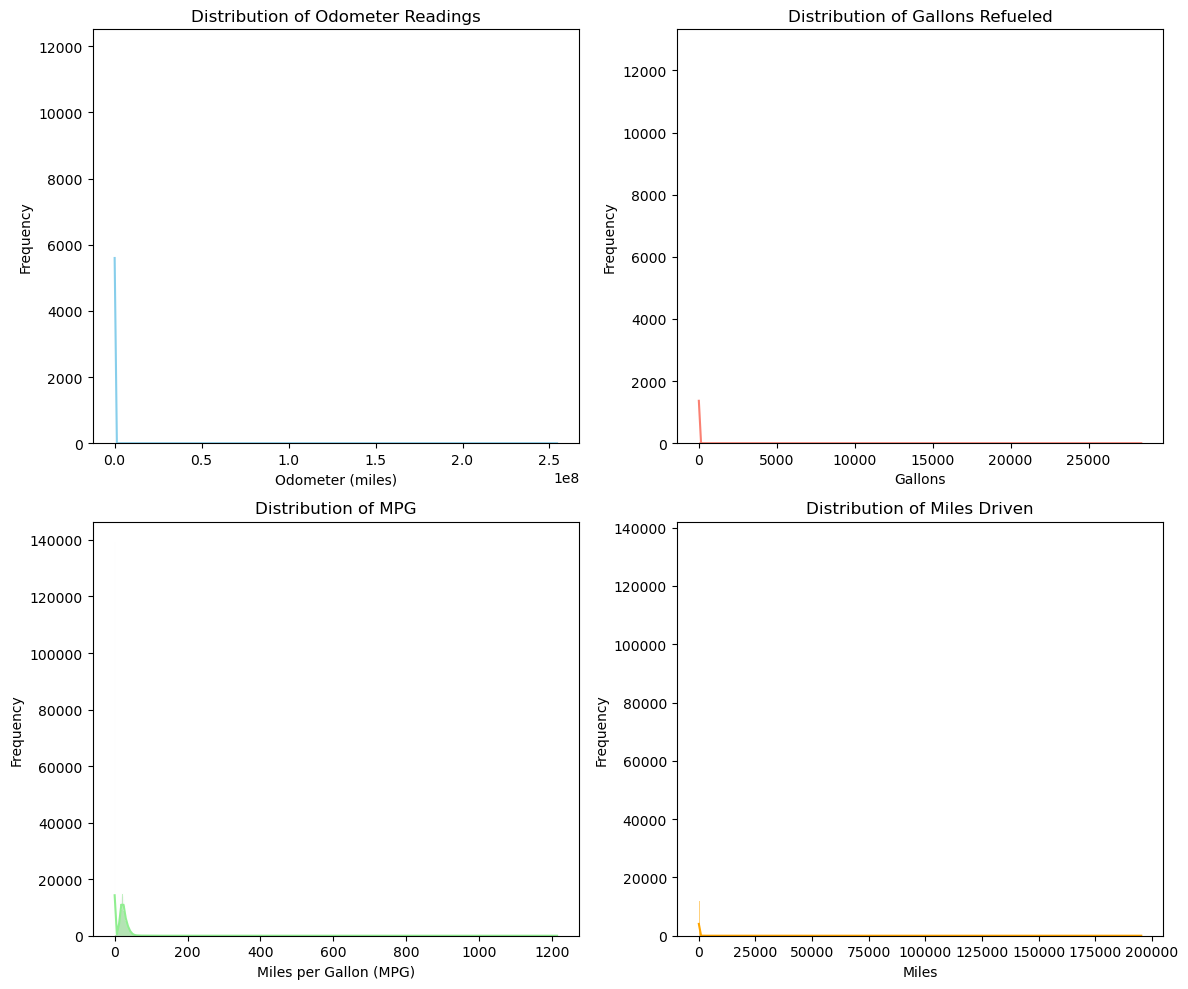

In [11]:
#1.2.4

# Set up the plotting environment
plt.figure(figsize=(12, 10))

df_temp = df.copy()
# Plot distribution for 'odometer'
plt.subplot(2, 2, 1)
sns.histplot(df_temp['odometer'].dropna(), kde=True, color='skyblue')
plt.title('Distribution of Odometer Readings')
plt.xlabel('Odometer (miles)')
plt.ylabel('Frequency')

# Plot distribution for 'gallons'
plt.subplot(2, 2, 2)
sns.histplot(df_temp['gallons'].dropna(), kde=True, color='salmon')
plt.title('Distribution of Gallons Refueled')
plt.xlabel('Gallons')
plt.ylabel('Frequency')

# Plot distribution for 'mpg'
plt.subplot(2, 2, 3)
sns.histplot(df_temp['mpg'].dropna(), kde=True, color='lightgreen')
plt.title('Distribution of MPG')
plt.xlabel('Miles per Gallon (MPG)')
plt.ylabel('Frequency')

# Plot distribution for 'miles'
plt.subplot(2, 2, 4)
sns.histplot(df_temp['miles'].dropna(), kde=True, color='orange')
plt.title('Distribution of Miles Driven')
plt.xlabel('Miles')
plt.ylabel('Frequency')

# Adjust layout for better fit
plt.tight_layout()
plt.show()

In [12]:
#1.2.5

# Ensure columns are floats
df['odometer'] = df['odometer'].astype(float)
df['gallons'] = df['gallons'].astype(float)
df['mpg'] = df['mpg'].astype(float)
df['miles'] = df['miles'].astype(float)

# Compute descriptive statistics
statistics = pd.DataFrame()

for column in ['odometer', 'gallons', 'mpg', 'miles']:
    stats = df[column].describe()
    mode = df[column].mode()[0]  # Get the most frequent value
    statistics[column] = pd.Series({
        'mean': stats['mean'],
        'std': stats['std'],
        'min': stats['min'],
        '25%': stats['25%'],
        '50%': stats['50%'],
        '75%': stats['75%'],
        'max': stats['max'],
        'most_frequent': mode
    })

print(statistics)

                   odometer       gallons          mpg          miles
mean           1.039960e+05     12.801068    22.163322     269.489628
std            3.405252e+05     74.472096    15.743052     725.709249
min            0.000000e+00      0.000000     0.000000       0.000000
25%            4.592000e+04      8.990000    15.600000     181.400000
50%            9.188200e+04     11.954000    21.800000     267.058000
75%            1.469220e+05     14.939000    28.500000     342.769250
max            2.543621e+08  28380.000000  1214.300000  195321.200000
most_frequent  1.000000e+00     10.567000     0.000000       0.000000


## Question 2


In [13]:
#2.1 currency column
def get_symbol_value(price):
    if isinstance(price, str):
        pattern =  r'(\D*)[\d\,\.]+(\D*)'
        unit = re.match(pattern, price.strip()).groups()
        numeric_value = re.findall(r'[\d\,\.]+', price.strip())[0]
        return (unit[0] or unit[1]).strip(), numeric_value.lstrip('.')
    return pd.NA, 0.0

df['currency'] = df['total_spent'].apply(lambda row: get_symbol_value(row)[0])

In [14]:
#2.2 float value total spend and cost per gallon
df['total_spent_float'] = df['total_spent'].apply(lambda row: get_symbol_value(row)[1])
df['total_spent_float'] = df['total_spent_float'].apply(lambda x: to_float(x) if isinstance(x, str) else x)

df['cost_per_gallon_float'] = df['cost_per_gallon'].apply(lambda row: get_symbol_value(row)[1])
df['cost_per_gallon_float'] = df['cost_per_gallon_float'].apply(lambda x: to_float(x) if isinstance(x, str) else x)

In [15]:
#2.3 car make, model, year, user id
def get_user_info(url):
    pattern = r'https://www\.somewebsite\.com/([^/]+)/([^/]+)/(\d+)/(\d+)'
    match = re.match(pattern, url.strip())
    if match:
        return match.groups()
    
    pattern = r'https://www\.somewebsite\.com/([^/]+)/([^/]+)/(\d+)'
    match = re.match(pattern, url.strip())
    if match:
        if len(match[2]) == 4:
            return match.group(1), match.group(2), match.group(3), pd.NA
        else:
            return match.group(1), match.group(2), pd.NA, match.group(3)
    
    pattern = r'https://www\.somewebsite\.com/([^/]+)/([^/]+)'
    match = re.match(pattern, url.strip())
    if match:
        return match.group(1), match.group(2), pd.NA, pd.NA

df[['car_make', 'model', 'year', 'user_id']] = pd.DataFrame(df['user_url'].apply(get_user_info).tolist(), index=df.index)

#df['car_make'] = df['user_url'].apply(lambda row: get_user_info(row)[0])
#df['model'] = df['user_url'].apply(lambda row: get_user_info(row)[1])
#df['year'] = df['user_url'].apply(lambda row: get_user_info(row)[2])
#df['user_id'] = df['user_url'].apply(lambda row: get_user_info(row)[3])

In [16]:
#part 2 q2
#litres filled - using UK gallons
def to_litre(x):
    try:
        return float(x) * 4.54609
    except (ValueError, TypeError):
        return 0.0

df['litres_filled'] = df['gallons'].apply(to_litre)

In [17]:
#km driven


## Question 3


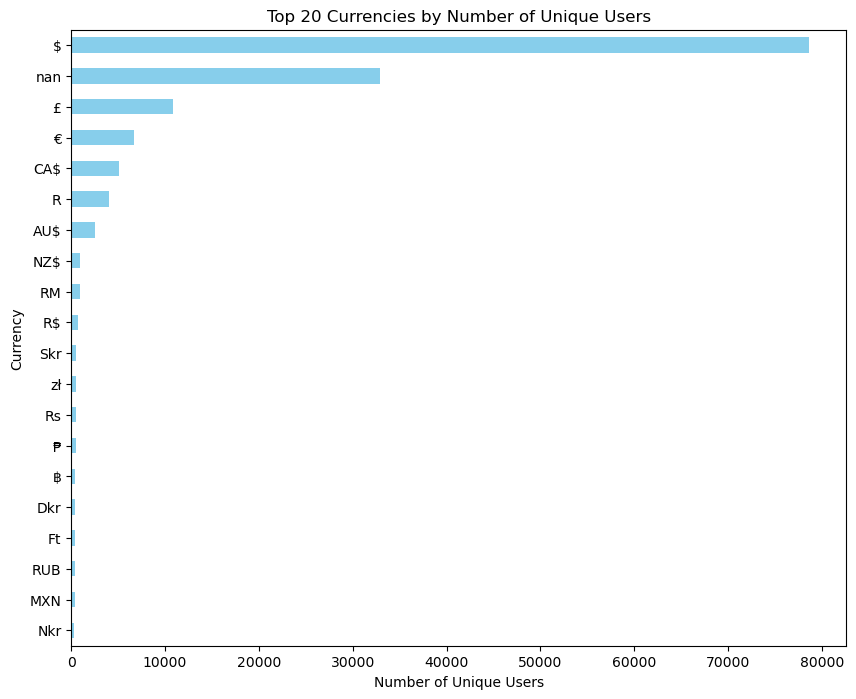

In [18]:
#Q3.1

# Step 1: Define a function to extract the currency symbol
def extract_currency(entry):
    match = re.match(r'[^0-9.,]+', str(entry))
    return match.group(0) if match else None

# Step 2: Apply the function to the 'total_spent' column to create a 'currency' column
df['currency'] = df['total_spent'].apply(extract_currency)

# Step 3: Remove NaN values from the 'currency' column
df = df.dropna(subset=['currency'])

# Step 4: Group by 'currency' and count unique 'user_id's
unique_users_per_currency = df.groupby('currency')['user_id'].nunique()

# Step 5: Sort the Series by the number of unique users in descending order
unique_users_per_currency = unique_users_per_currency.sort_values(ascending=False)

# Step 6: Limit the number of currencies to top 20 for display
top_currencies = unique_users_per_currency.head(20)

# Step 7: Plot the results as a horizontal bar plot
top_currencies.plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.title('Top 20 Currencies by Number of Unique Users')
plt.xlabel('Number of Unique Users')
plt.ylabel('Currency')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.show()

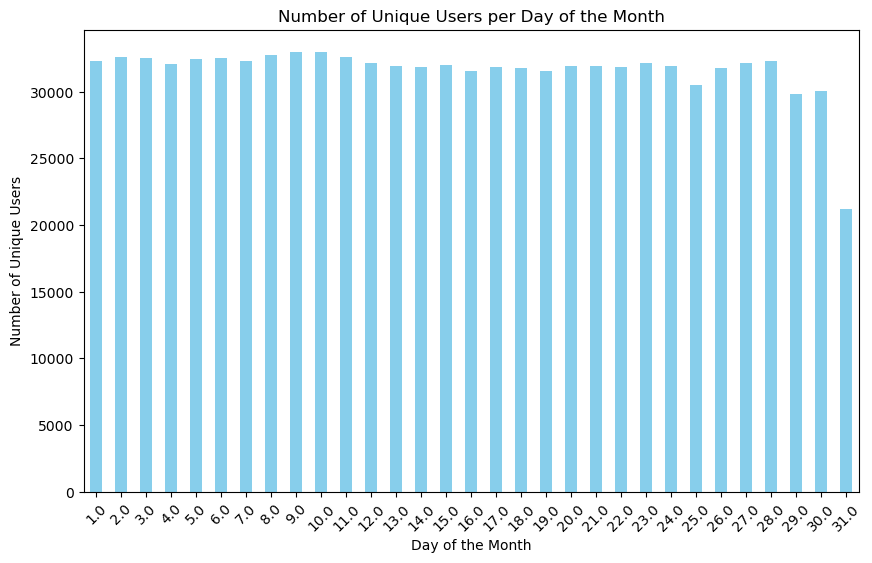

In [19]:
#3.2 

# Step 1: Extract the day of the month from 'date_fueled'
df['day_of_month'] = df['date_fueled'].dt.day

# Step 2: Group by 'day_of_month' and count unique 'user_id's
unique_users_per_day = df.groupby('day_of_month')['user_id'].nunique()

# Step 3: Sort the days of the month to ensure the plot is in the correct order
unique_users_per_day = unique_users_per_day.sort_index()

# Step 4: Plot the results as a bar plot
unique_users_per_day.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Unique Users per Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45)
plt.show()

In [20]:
#dictionary mapping symbol to name
currency_to_country = {
    '$': 'United States Dollar (USD)',
    '£': 'British Pound Sterling (GBP)',
    'RON': 'Romanian Leu (RON)',
    '€': 'Euro (EUR)',
    'NZ$': 'New Zealand Dollar (NZD)',
    'zł': 'Polish Zloty (PLN)',
    'AU$': 'Australian Dollar (AUD)',
    '₩': 'South Korean Won (KRW)',
    'Ft': 'Hungarian Forint (HUF)',
    'Nkr': 'Norwegian Krone (NOK)',
    'R$': 'Brazilian Real (BRL)',
    'CA$': 'Canadian Dollar (CAD)',
    'RUB': 'Russian Ruble (RUB)',
    '₪': 'Israeli Shekel (ILS)',
    'Rp': 'Indonesian Rupiah (IDR)',
    'RM': 'Malaysian Ringgit (MYR)',
    'R': 'South African Rand (ZAR)',
    'Skr': 'Swedish Krona (SEK)',
    'AR$': 'Argentine Peso (ARS)',
    'TL': 'Turkish Lira (TRY)',
    'din': 'Serbian Dinar (RSD)',
    'Ikr': 'Icelandic Krona (ISK)',
    '฿': 'Thai Baht (THB)',
    'CN¥': 'Chinese Yuan Renminbi (CNY)',
    'HK$': 'Hong Kong Dollar (HKD)',
    'Dkr': 'Danish Krone (DKK)',
    '₡': 'Costa Rican Colón (CRC)',
    '₴': 'Ukrainian Hryvnia (UAH)',
    'IRR': 'Iranian Rial (IRR)',
    'S$': 'Singapore Dollar (SGD)',
    'Rs': 'Indian Rupee (INR)',
    'BGN': 'Bulgarian Lev (BGN)',
    '¥': 'Japanese Yen (JPY)',
    'AED': 'United Arab Emirates Dirham (AED)',
    'MKD': 'Macedonian Denar (MKD)',
    '₱': 'Philippine Peso (PHP)',
    'BD': 'Bahraini Dinar (BHD)',
    'CL$': 'Chilean Peso (CLP)',
    'EC$': 'East Caribbean Dollar (XCD)',
    '$U': 'Uruguayan Peso (UYU)',
    'LE': 'Egyptian Pound (EGP)',
    'MXN': 'Mexican Peso (MXN)',
    'CO$': 'Colombian Peso (COP)',
    'CFPF': 'CFP Franc (XPF)',
    'Kč': 'Czech Koruna (CZK)',
    'kn': 'Croatian Kuna (HRK)',
    'JD': 'Jordanian Dinar (JOD)',
    'FCFA': 'CFA Franc BCEAO (XOF)',
    'NT$': 'New Taiwan Dollar (TWD)',
    'BN$': 'Brunei Dollar (BND)',
    'RD$': 'Dominican Peso (DOP)',
    'S/': 'Peruvian Sol (PEN)',
    'J$': 'Jamaican Dollar (JMD)',
    'PKRs': 'Pakistani Rupee (PKR)',
    'Ksh': 'Kenyan Shilling (KES)',
    'GY$': 'Guyanese Dollar (GYD)',
    'KM': 'Bosnia and Herzegovina Convertible Mark (BAM)',
    'Fr': 'Swiss Franc (CHF)',
    'CFA': 'Central African CFA Franc (XAF)',
    'MDL': 'Moldovan Leu (MDL)',
    'MMK': 'Myanmar Kyat (MMK)',
    'N$': 'Namibian Dollar (NAD)',
    '₦': 'Nigerian Naira (NGN)',
    'ZWL': 'Zimbabwean Dollar (ZWL)',
    'USh': 'Ugandan Shilling (UGX)',
    'MURs': 'Mauritian Rupee (MUR)',
    'BYN': 'Belarusian Ruble (BYN)',
    'TT$': 'Trinidad and Tobago Dollar (TTD)',
    'KD': 'Kuwaiti Dinar (KWD)',
    'B/': 'Panamanian Balboa (PAB)',
    'Bs': 'Venezuelan Bolivar (VES)',
    'SLRs': 'Sri Lankan Rupee (LKR)',
    'SR': 'Saudi Riyal (SAR)',
    'GTQ': 'Guatemalan Quetzal (GTQ)',
    'QR': 'Qatari Riyal (QAR)',
    'Br': 'Ethiopian Birr (ETB)',
    'C$': 'Nicaraguan Córdoba (NIO)',
    'BWP': 'Botswana Pula (BWP)',
    'GH₵': 'Ghanaian Cedi (GHS)',
    'Tk': 'Bangladeshi Taka (BDT)',
    'SR$': 'Surinamese Dollar (SRD)',
    'man': 'Azerbaijani Manat (AZN)',
    'KHR': 'Cambodian Riel (KHR)',
    'BZ$': 'Belize Dollar (BZD)',
    'Bds$': 'Barbadian Dollar (BBD)',
    'Kz': 'Angolan Kwanza (AOA)',
    'NPRs': 'Nepalese Rupee (NPR)',
    'OMR': 'Omani Rial (OMR)',
    '₲': 'Paraguayan Guarani (PYG)',
    'LB£': 'Lebanese Pound (LBP)',
    'HNL': 'Honduran Lempira (HNL)',
    'AMD': 'Armenian Dram (AMD)',
    'GEL': 'Georgian Lari (GEL)',
    '₮': 'Mongolian Tögrög (MNT)',
    'MTn': 'Mozambican Metical (MZN)',
    'ZMW': 'Zambian Kwacha (ZMW)',
    'SH£': 'Saint Helena Pound (SHP)',
    '₫': 'Vietnamese Dong (VND)',
    'RWF': 'Rwandan Franc (RWF)',
    'MGA': 'Malagasy Ariary (MGA)',
    'DT': 'Tunisian Dinar (TND)',
    'VT': 'Vanuatu Vatu (VUV)',
    'MOP$': 'Macanese Pataca (MOP)',
    'TMT': 'Turkmenistani Manat (TMT)',
    'SY£': 'Syrian Pound (SYP)',
    'BS$': 'Bahamian Dollar (BSD)',
    'Af': 'Afghan Afghani (AFN)',
    'ALL': 'Albanian Lek (ALL)',
    'DA': 'Algerian Dinar (DZD)',
    'TSh': 'Tanzanian Shilling (TZS)',
    'KY$': 'Cayman Islands Dollar (KYD)',
    'NAf': 'Netherlands Antillean Guilder (ANG)',
    'KZT': 'Kazakhstani Tenge (KZT)',
    'YR': 'Yemeni Rial (YER)',
    'MAD': 'Moroccan Dirham (MAD)',
    'CV$': 'Cape Verdean Escudo (CVE)',
    'IQD': 'Iraqi Dinar (IQD)',
    'CU$': 'Cuban Peso (CUP)',
    'KGS': 'Kyrgyzstani Som (KGS)',
    'L$': 'Liberian Dollar (LRD)'
}

In [21]:
#3.3
# Step 1: Filter for the last known vehicle age for each user
df_latest_age = df.loc[df.groupby('user_id')['date_fueled'].idxmax()]

# Step 2: Calculate the average vehicle age per country
average_age_per_country = df_latest_age.groupby('country')['vehicle_age'].mean().sort_values()

# Step 3: Plot the average vehicle age per country
plt.figure(figsize=(10, 16))
average_age_per_country.plot(kind='barh', color='skyblue')
plt.title('Average Vehicle Age per Country (Based on Last Known Age)')
plt.xlabel('Average Vehicle Age (Years)')
plt.ylabel('Country')
plt.show()

KeyError: '[nan] not in index'

In [24]:
df.head(5)

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,valid_date_fueled,currency,total_spent_float,cost_per_gallon_float,car_make,model,year,user_id,litres_filled,day_of_month
0,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,False,nan,0.00,0.000,suzuki,swift,2015,674857,NaN,7.0
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,True,$,67.86,5.599,bmw,x3,2009,461150,55.098611,7.0
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,True,£,43.53,5.450,mercedes-benz,e300,1998,133501,36.327805,22.0
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,True,£,54.00,5.110,bmw,320d,2010,247233,48.074902,4.0
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,True,$,35.29,3.029,honda,passport,2019,1038865,52.966495,15.0


# Question 4 #

### 4.2 ###


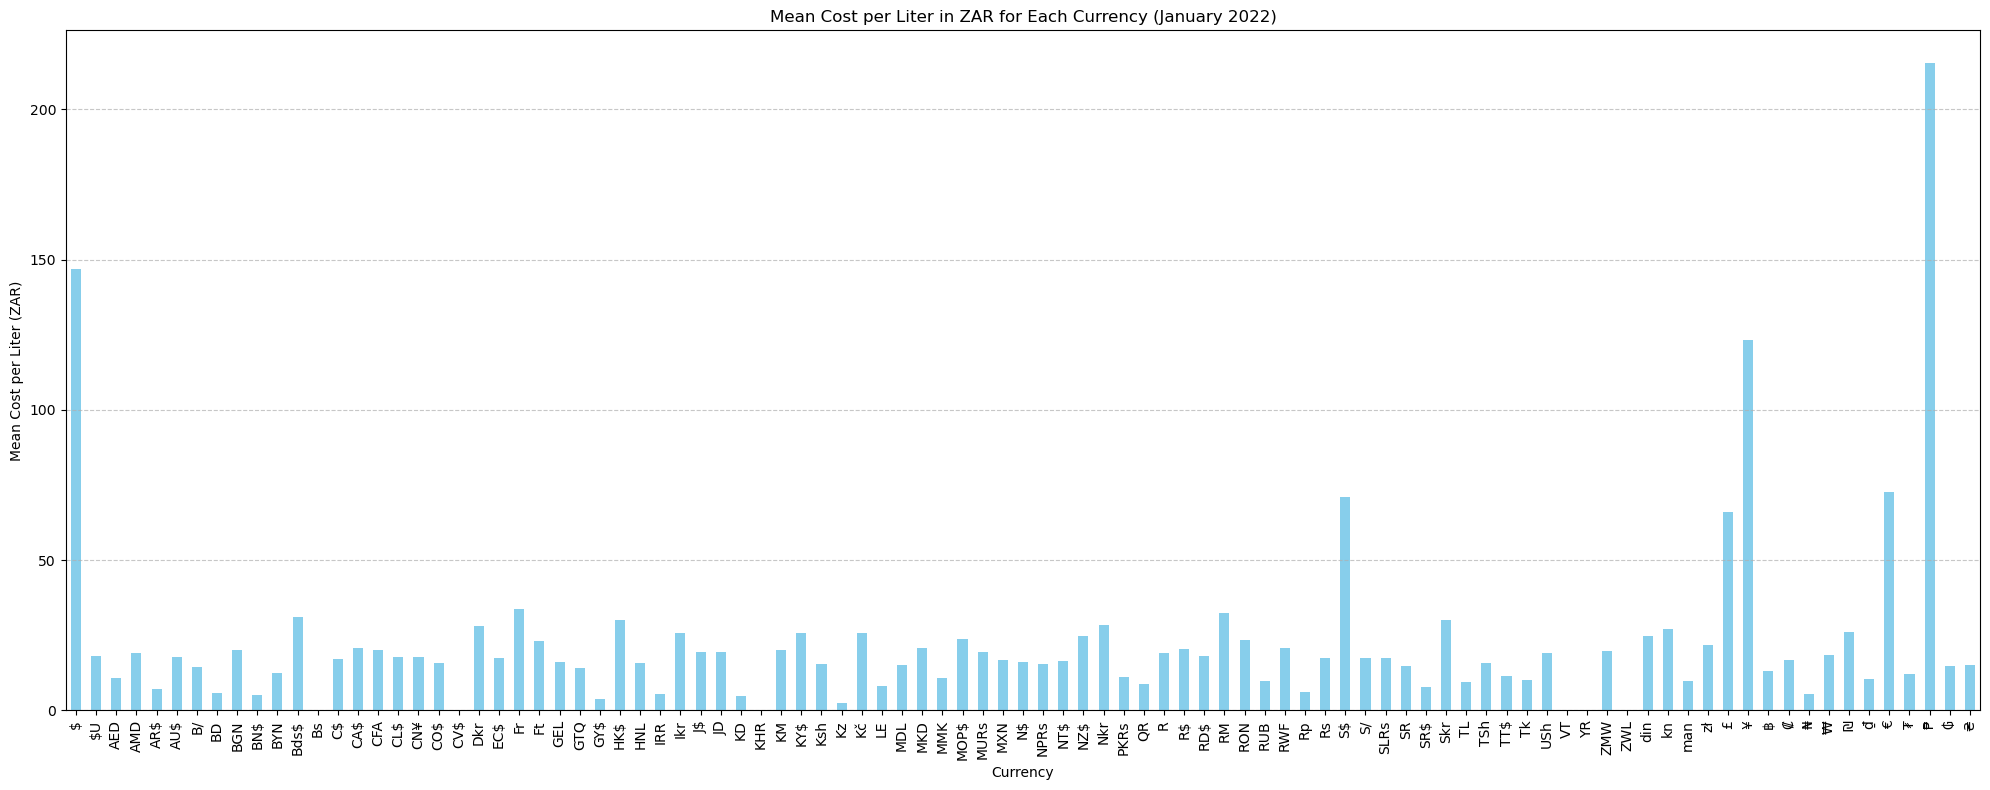

In [37]:
#4.2.1


# Define the conversion rates dictionary
country_to_conversion_rate = {
    '$': 15.50,
    '£': 21.00,
    'RON': 3.80,
    '€': 18.00,
    'NZ$': 10.50,
    'zł': 4.00,
    'AU$': 11.00,
    '₩': 0.013,
    'Ft': 0.049,
    'Nkr': 1.70,
    'R$': 3.20,
    'CA$': 12.50,
    'RUB': 0.20,
    '₪': 4.30,
    'Rp': 0.001,
    'RM': 3.70,
    'R': 1.00,
    'Skr': 1.60,
    'AR$': 0.075,
    'TL': 0.80,
    'din': 0.15,
    'Ikr': 0.11,
    '฿': 0.45,
    'CN¥': 2.40,
    'HK$': 2.00,
    'Dkr': 2.40,
    '₡': 0.025,
    '₴': 0.55,
    'IRR': 0.00037,
    'S$': 11.60,
    'Rs': 0.21,
    'BGN': 9.20,
    '¥': 0.14,
    'AED': 4.20,
    'MKD': 0.30,
    '₱': 4.10,
    'BD': 40.70,
    'CL$': 0.019,
    'EC$': 5.70,
    '$U': 0.35,
    'LE': 0.95,
    'MXN': 0.77,
    'CO$': 0.004,
    'CFPF': 0.14,
    'Kč': 0.75,
    'kn': 2.40,
    'JD': 21.85,
    'FCFA': 0.030,
    'NT$': 0.56,
    'BN$': 11.60,
    'RD$': 0.27,
    'S/': 4.10,
    'J$': 0.10,
    'PKRs': 0.075,
    'Ksh': 0.14,
    'GY$': 0.073,
    'KM': 9.20,
    'Fr': 19.00,
    'CFA': 0.030,
    'MDL': 0.87,
    'MMK': 0.007,
    'N$': 1.00,
    '₦': 0.033,
    'ZWL': 0.004,
    'USh': 0.004,
    'MURs': 0.35,
    'BYN': 6.00,
    'TT$': 2.28,
    'KD': 51.00,
    'B/': 15.50,
    'Bs': 0.00011,
    'SLRs': 0.078,
    'SR': 4.20,
    'GTQ': 2.00,
    'QR': 4.20,
    'Br': 0.29,
    'C$': 0.42,
    'BWP': 1.44,
    'GH₵': 1.20,
    'Tk': 0.14,
    'SR$': 0.43,
    'man': 9.15,
    'KHR': 0.0038,
    'BZ$': 7.80,
    'Bds$': 7.80,
    'Kz': 0.020,
    'NPRs': 0.12,
    'OMR': 40.20,
    '₲': 0.0021,
    'LB£': 0.010,
    'HNL': 0.62,
    'AMD': 0.038,
    'GEL': 5.10,
    '₮': 0.0044,
    'MTn': 0.24,
    'ZMW': 0.93,
    'SH£': 19.00,
    '₫': 0.00066,
    'RWF': 0.017,
    'MGA': 0.0037,
    'DT': 5.50,
    'VT': 0.14,
    'MOP$': 1.92,
    'TMT': 4.45,
    'SY£': 0.006,
    'BS$': 15.50,
    'Af': 0.19,
    'ALL': 0.15,
    'DA': 0.11,
    'TSh': 0.0062,
    'KY$': 18.60,
    'NAf': 8.60,
    'KZT': 0.034,
    'YR': 0.062,
    'MAD': 1.60,
    'CV$': 0.18,
    'IQD': 0.0105,
    'CU$': 15.50,
    'KGS': 0.18,
    'L$': 0.080
}

# Assuming the DataFrame is named df

# Convert 'date_fueled' to datetime if not already done
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')

# Filter for January 2022
jan_2022_df = df[(df['date_fueled'].dt.year == 2022) & (df['date_fueled'].dt.month == 1)].copy()


# Convert cost_per_gallon to cost_per_liter in ZAR
def convert_to_zar(row):
    currency = row['currency']
    if currency in country_to_conversion_rate:
        conversion_rate = country_to_conversion_rate[currency]
        cost_per_gallon_zar = row['cost_per_gallon_float'] * conversion_rate
        cost_per_liter_zar = cost_per_gallon_zar / 3.78541  # Gallon to liter conversion
        return cost_per_liter_zar
    else:
        return None

# Apply conversion and add new column
jan_2022_df['cost_per_liter_zar'] = jan_2022_df.apply(convert_to_zar, axis=1)

# Drop rows with None in 'cost_per_liter_zar'
jan_2022_df = jan_2022_df.dropna(subset=['cost_per_liter_zar'])

# Print results or save to file
# jan_2022_df[['date_fueled', 'currency', 'cost_per_liter_zar']].head(30)

# Calculate the mean cost per liter per currency
mean_cost_per_liter_per_currency = jan_2022_df.groupby('currency')['cost_per_liter_zar'].mean()



# Plot mean cost per liter per currency
plt.figure(figsize=(20, 8))
mean_cost_per_liter_per_currency.plot(kind='bar', color='skyblue')

plt.xlabel('Currency')
plt.ylabel('Mean Cost per Liter (ZAR)')
plt.title('Mean Cost per Liter in ZAR for Each Currency (January 2022)')
plt.xticks(rotation=90)  # Rotate x-axis labels to vertical
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()



